<a href="https://colab.research.google.com/github/SC30GSWNBA/Visual_Analysis_IPL_2023/blob/main/visual_analysis_of_ipl_2023_using_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://akm-img-a-in.tosshub.com/businesstoday/images/story/202202/ipl_0-sixteen_nine.jpg?size=948:533" align="center">

**About IPL:**

The Indian Premier League or the IPL is a men's Twenty20 (T20) cricket league that is annually held in India and contested by ten city-based franchise teams. The BCCI founded the league in 2007. The competition is usually held in summer between March and May every year.

The IPL is the most-popular cricket league in the world. In 2014, it was ranked sixth by average attendance among all sports leagues. The brand value of the league in 2022 was INR 90,038 crore (USD 11 billion). According to BCCI, the 2015 IPL season contributed INR 1,150 crore (USD 140 million) to the GDP of the economy of India.

The 2023 edition of the IPL was contested between 10 teams in which Chennai Super Kings emerged as the winner defeating Gujarat Titans in the finals of the tournament played at Narendra Modi Stadium in Ahmedabad.

Site URL: https://www.iplt20.com/


**Problem Statement:**

Visualize the performance of various teams in the 2023 edition of the IPL played between different teams in the group stages of the tournament using Seaborn Library in Python.

**Why Seaborn?**

Seaborn is one of the most powerful visualization library in Python. Seaborn is used to analyse and depict results with meaningful charts. It is built on top of matplotlib library and supports most of the functionalities of matplotlib.

API Link: https://seaborn.pydata.org/index.html

**Datasets**

There are five sets of data -

1) Batsman_Data.csv : Runs scored by players in each innings of each match in the group stages of the tournament. Attributes -

  - Match_No : Match number in the tournament
  - Innings : Innings in the match
  - Batsman : Name of the batter
  - Mode of Dismissal : How was the batter dismissed
  - Runs : Runs scored by the batter
  - Balls_Faced : Balls faced by the batter
  - 4s : Number of fours hit by the batter
  - 6s : Number of sixes hit by the batter
  - Strike_Rate : Rate at which the batter scored runs as compared to falls faced
  - Byes : Extras scored by the team in the form of byes
  - Leg_Byes : Extras scored by the team in the form of leg byes
  - No_Ball : Extras scored by the team in the form of No Balls
  - Wides : Extras scored by the team in the form of Wides
  - Impact_Sub : If the batter is an impact substitute
  - Captain : Is the batter the skipper of the team
  - Team : Name of the team

2) Bowler_Data.csv : Bowling Performance of players in each innings of each match in the group stages of the tournament. Attributes -

  - Match_No : Match number in the tournament
  - Innings : Innings in the match
  - Team : Name of the team
  - Batsman : Name of the bowler
  - Overs_Bowled : Number of overs bowled by the bowler
  - Maidens : Number of maiden overs bowled by the bowler
  - Runs_Scored : Number of runs conceded by the bowler
  - Wickets : Number of wickets taken the bowler
  - Economy_Rate : Rate at which the bowler conceded runs in each overs bowled by him.
  - 0s : Number of zeros conceded by the bowler
  - 4s : Number of fours conceded by the bowler
  - 6s : Number of sixes conceded by the bowler
  - Wides : Number of wides bowled by the bowler
  - No_Balls : Number of no balls bowled by the bowler
  - Impact_Sub : If the bowler is an impact substitute

3) Match_Details.csv : Outcome of each match in the group stages of the tournament. Attributes -

  - Match_No : Match number in the tournament
  - Match_Date : Date on which the match was played
  - Home_Team	: Name of the home team
  - Visiting_Team	: Name of the visiting team
  - Ground : Name of the cricket ground where the match was played
  - Toss : Name of the team who won the toss
  - Winner : Name of the winning team

4) Powerplay_Score.csv : Runs scored by each team in the first 6 overs of the match in the group stages of the tournament. Attributes -

  - Match_No : Match number in the tournament
  - Innings : Innings in the match
  - Team : Name of the team
  - Powerplay_Score	: Runs scored in the first 6 overs of the match by the team.
  - Wickets_Lost : Wickets lost in the first 6 overs of the match by the team.

5) Team_Wise_Player_Profile.csv : Squad details of each team in IPL 2023. Attributes -

  - Team : Name of the team
  - Player_Name	: Name of the player
  - Role : Role of the player in the team
  - Batter_Type	: Right handed or left handed batter
  - Bowler_Style : Type of Bowler
  - Bowler_Type	: Left handed or right handed bowler
  - Seamer_or_Spinner	: If the bowler is seamer or spinner
  - Overseas_Player : If the player is an overseas player

**Data Source:** https://www.espncricinfo.com/

# **Importing Libraries and Dataset**

### ***A. Importing Relevant Libraries***

In [ ]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### ***B. Reading all the Input Files***

In [ ]:
batsman_df = pd.read_csv('/kaggle/input/ipl-2023-datasets/Batsman_Data.csv', encoding='cp1252')
bowler_df = pd.read_csv('/kaggle/input/ipl-2023-datasets/Bowler_Data.csv', encoding='cp1252')
match_details_df = pd.read_csv('/kaggle/input/ipl-2023-datasets/Match_Details.csv', encoding='cp1252')
powerplay_df = pd.read_csv('/kaggle/input/ipl-2023-datasets/Powerplay_Score.csv', encoding='cp1252')
player_df = pd.read_csv('/kaggle/input/ipl-2023-datasets/Team_Wise_Player_Profile.csv', encoding='cp1252')

### ***C. Inspecting First Few Rows of the DataFrame***

In [ ]:
batsman_df.head()

,Match_No,Innings,Batsman,Mode of Dismissal,Runs,Balls_Faced,4s,6s,Strike_Rate,Byes,Leg_Byes,No_Ball,Wides,Impact_Sub,Captain,Team
0,1,1st,Devon Conway,b Mohammed Shami,1,6.0,0.0,0.0,16.66,NaN,NaN,NaN,NaN,No,No,CSK
1,1,1st,Ruturaj Gaikwad,c Shubman Gill b Joseph,92,50.0,4.0,9.0,184,NaN,NaN,NaN,NaN,No,No,CSK
2,1,1st,Moeen Ali,c †Saha b Rashid Khan,23,17.0,4.0,1.0,135.29,NaN,NaN,NaN,NaN,No,No,CSK
3,1,1st,Ben Stokes,c †Saha b Rashid Khan,7,6.0,1.0,0.0,116.66,NaN,NaN,NaN,NaN,No,No,CSK
4,1,1st,Ambati Rayudu,b Little,12,12.0,0.0,1.0,100,NaN,NaN,NaN,NaN,Yes,No,CSK


In [ ]:
bowler_df.head()

,Match_No,Innings,Team,Bowler,Overs_Bowled,Maidens,Runs_Scored,Wickets,Economy_Rate,0s,4s,6s,Wides,No_Balls,Impact_Sub
0,1,1st,GT,Mohammed Shami,4.0,0,29,2,7.25,13,2,2,0,1,No
1,1,1st,GT,Hardik Pandya,3.0,0,28,0,9.33,6,2,2,0,0,No
2,1,1st,GT,Josh Little,4.0,0,41,1,10.25,10,4,3,0,0,No
3,1,1st,GT,Rashid Khan,4.0,0,26,2,6.50,10,2,1,0,0,No
4,1,1st,GT,Alzarri Joseph,4.0,0,33,2,8.25,8,0,3,0,0,No


In [ ]:
match_details_df.head()

,Match_No,Match_Date,Home_Team,Visiting_Team,Ground,Toss,Winner
0,1,31-Mar-23,GT,CSK,Ahmedabad,GT,GT
1,2,01-Apr-23,PK,KKR,Mohali,KKR,PK
2,3,01-Apr-23,LSG,DC,Lucknow,DC,LSG
3,4,02-Apr-23,SRH,RR,Hyderabad,SRH,RR
4,5,02-Apr-23,RCB,MI,Bengaluru,RCB,RCB


In [ ]:
powerplay_df.head()

,Match_No,Innings,Team,Powerplay_Score,Wickets_Lost
0,1,1st,CSK,51,2
1,1,2nd,GT,65,1
2,2,1st,PK,56,1
3,2,2nd,KKR,46,3
4,3,1st,LSG,30,1


In [ ]:
player_df.head()

,Team,Player_Name,Role,Batter_Type,Bowler_Style,Bowler_Type,Seamer_or_Spinner,Overseas_Player
0,CSK,MS Dhoni,Wicketkeeper Batter,Right hand Bat,Right arm Medium,Right,Seamer,No
1,CSK,Akash Singh,Bowler,Right hand Bat,Left arm Medium fast,Left,Seamer,No
2,CSK,Moeen Ali,Batting Allrounder,Left hand Bat,Right arm Offbreak,Right,Spinner,Yes
3,CSK,Bhagath Varma,Bowling Allrounder,Right hand Bat,Right arm Offbreak,Right,Spinner,No
4,CSK,Deepak Chahar,Bowler,Right hand Bat,Right arm Medium,Right,Seamer,No


# **Chart Type 1: Count Plot**

- CountPlot shows the counts of observations in each categorical bin using bars.

- CountPlot cannot be used for quantitative variables.
(Example: Number of people who performed transaction in an ATM across 7 days of the week, Total footfall across different apparel stores in Delhi)

**Let's understand Count Plot with the help of few examples**

### ***A. How many matches were won by home team ?***

In [ ]:
# Creating a function to find the winner of each IPL match

def Winner(x, y):

  if y == 'No Result':

    return 'No Result'

  elif x == y:

    return 'Yes'

  else:

    return 'No'

match_details_df['Winning_Team'] = match_details_df.apply(lambda x : Winner(x['Home_Team'], x['Winner']), axis = 1)

[]

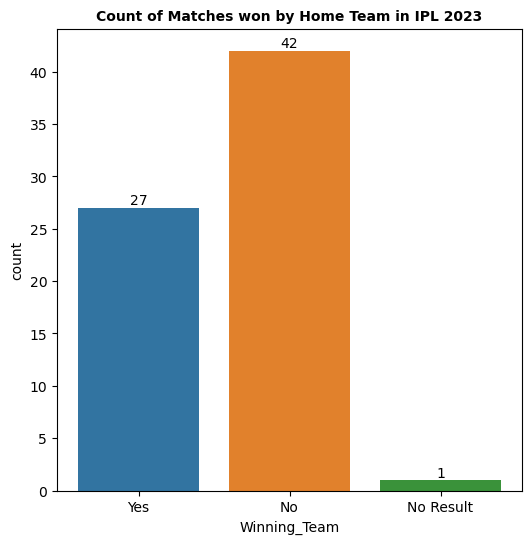

In [ ]:
# Size of the Chart
fig = plt.figure(figsize=(6,6))

# Plotting the Count Plot
ax = sns.countplot(x=match_details_df["Winning_Team"])

# Displaying values corresponding to each bar
ax.bar_label(ax.containers[0])

# Setting Title Name
ax.set_title('Count of Matches won by Home Team in IPL 2023', fontsize =10, fontweight ='bold')

# Displaying Chart
plt.plot()

**Observation:**

- Well! Well! Well! I wasn't expecting that. Almost 60% of the matches played in the group stages of the tournament was won the visiting team.

- One of the matches played between Chennai Super Kings and Lucknow Super Giants in Lucknow was a washout and hence - 'No Result'.

### ***B. Was Toss a big factor in IPL 2023 ?***

In [ ]:
# Figuring out the winner

match_details_df['Toss A Factor ?'] = match_details_df.apply(lambda x : Winner(x['Toss'], x['Winner']), axis = 1)

[]

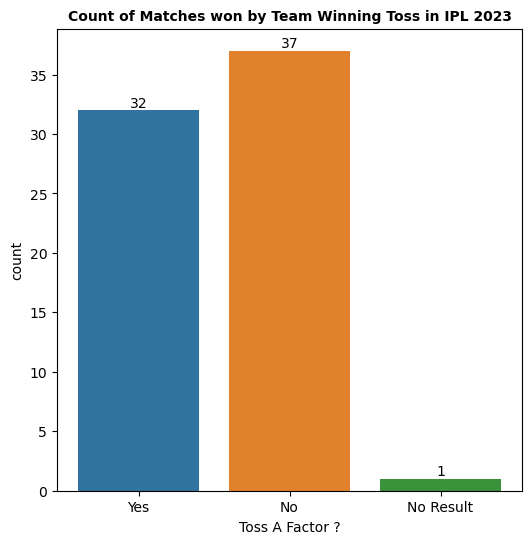

In [ ]:
# Size of the Chart
fig = plt.figure(figsize=(6,6))

# Plotting the Count Plot
ax = sns.countplot(x=match_details_df["Toss A Factor ?"])

# Displaying values corresponding to each bar
ax.bar_label(ax.containers[0])

# Setting Title Name
ax.set_title('Count of Matches won by Team Winning Toss in IPL 2023', fontsize =10, fontweight ='bold')

# Displaying Chart
plt.plot()

**Observation:**

- Toss really a big factor in the outcome of the match. Hmmmmmm.... not really. Seems like more
    than half of the matches played was won by the team losing the toss. So, not really a big plus in
    winning the toss. What say people?

# **Chart Type 2: Bar Chart or Manhattan Chart**

- A Bar Chart or Manhattan Chart is a chart or a graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.

- Manhattan Chart comes in handy when we want to display comparison of numbers, which could be both discrete and continuous across different categories in the dataset. (Example: Total Sales across different regions in the state, Average Price per Unit of item at a Walmart store, Temperature in different cities of India)

**Let's understand Bar Chart with the help of few examples**

### ***A. Which batting team is making the best use of the powerplay ?***

In [ ]:
# Analysis to figure out the powerplay score and wickets lost by teams in each IPL match of 2023

analysis1 = powerplay_df.groupby(['Team']).agg({'Powerplay_Score':'mean', 'Wickets_Lost':'mean'}).reset_index()
analysis2 = powerplay_df.groupby(['Team','Innings']).agg({'Powerplay_Score':'mean', 'Wickets_Lost':'mean'}).reset_index()
analysis1['Powerplay_Score'] = np.round(analysis1['Powerplay_Score'], 2)
analysis1['Wickets_Lost'] = np.round(analysis1['Wickets_Lost'], 2)
analysis2['Powerplay_Score'] = np.round(analysis2['Powerplay_Score'], 2)
analysis2['Wickets_Lost'] = np.round(analysis2['Wickets_Lost'], 2)

[]

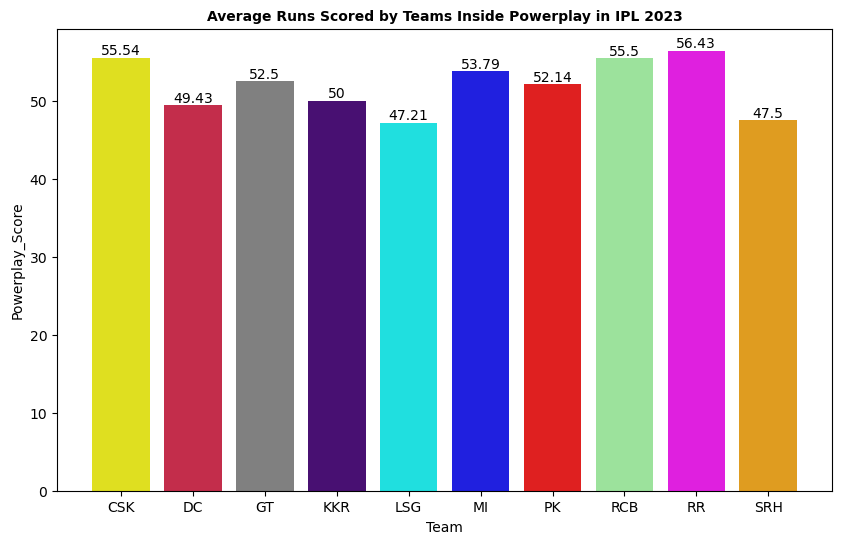

In [ ]:
# Size of the Chart
fig = plt.figure(figsize=(10,6))

# Choosing color palette for teams
palette = ['yellow', 'crimson', 'grey', 'indigo','cyan', 'blue','red','lightgreen','magenta','orange']

# Plotting the Bar Chart
ax = sns.barplot(data=analysis1, x="Team", y="Powerplay_Score", palette = palette)

# Displaying values corresponding to each bar
ax.bar_label(ax.containers[0])

# Setting Title Name
ax.set_title('Average Runs Scored by Teams Inside Powerplay in IPL 2023', fontsize =10, fontweight ='bold')

# Displaying Chart
plt.plot()

[]

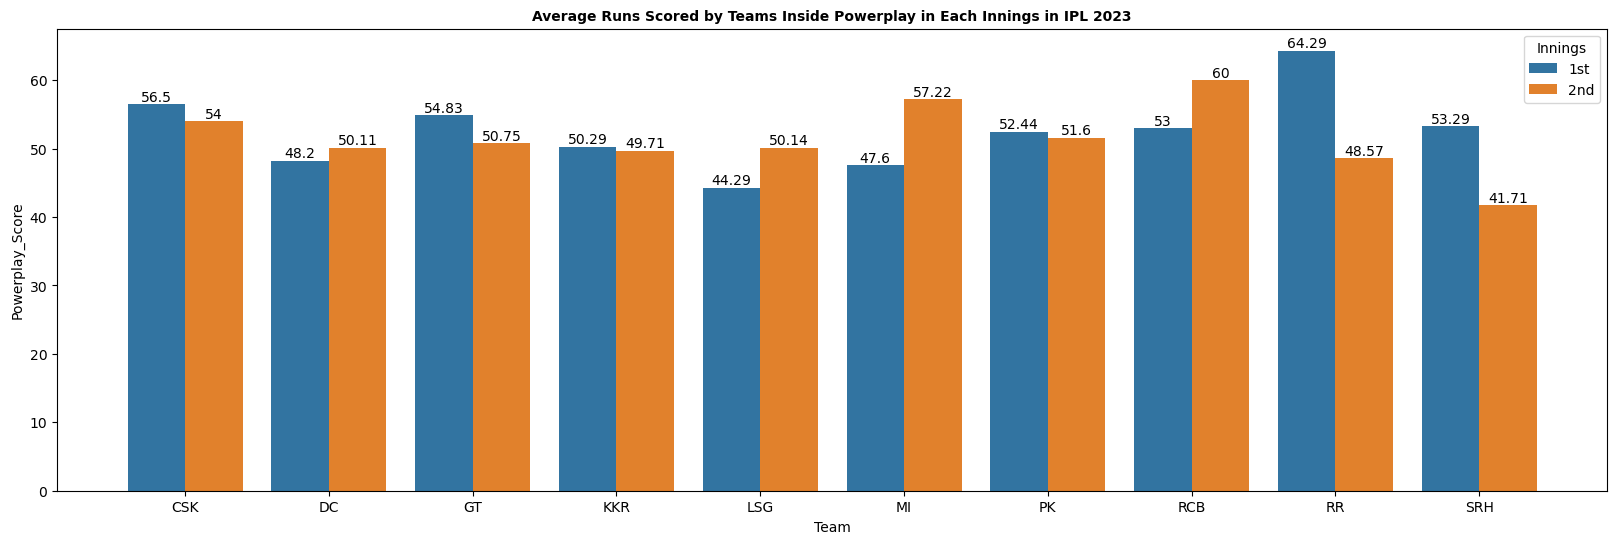

In [ ]:
# Size of the Chart
fig = plt.figure(figsize=(20,6))

# Plotting the Bar Chart
ax = sns.barplot(data=analysis2, x="Team", y="Powerplay_Score", hue = "Innings")

# Displaying values corresponding to 1st bar for each team
ax.bar_label(ax.containers[0])
# Displaying values corresponding to 2nd bar for each team
ax.bar_label(ax.containers[1])

# Setting Title Name
ax.set_title('Average Runs Scored by Teams Inside Powerplay in Each Innings in IPL 2023', fontsize =10, fontweight ='bold')

# Displaying Chart
plt.plot()

**Facts:**

- No surprises there eh? Chennai Super Kings (CSK), Gujarat Titans (GT), Royal Challengers Bangalore (RCB)
    and Rajasthan Royals (RR) had scored a great deal of the runs in the powerplay and the large marjority
    of which could be attributed to the opening partnership of these 4 teams. Ruturaj Gaikwad and Devon Conway
    for CSK, Shubhman Gill and Wriddhiman Saha for GT, Virat Kohli and Faf Du Plessis for RCB and
    Yashasvi Jaiswal and Jos Buttler for RR were the key contributors in the powerplay.

- On the other hand Kolkata Knight Riders (KKR), Lucknow Super Giants (LSG), Delhi Capitals (DC),
    Sunrisers Hyderabad (SRH) and Punjab Kings (PK) had a decent start in the powerplays as one of
    the opening pair stuggled to get going in the first 6 overs of the innings. David Warner was the only
    shinning knight for DC in the first six overs, KKR never really got partnership going due to
    the struggles with different combinations at the top of the order, KL Rahul and Shikhar Dhawan struggled
    to get going in the powerplay for LSG and PK respectively while SRH never really had a smooth start
    to the innings in the first 6 overs of the match.

- Mumbai Indians (MI) although chased well in the second half of the tournament but they struggled
    to set the tone in the powerplay overs, particularly while setting target for the opposition teams.

### ***B. Which batting team has lost fewer wickets in the powerplay ?***

[]

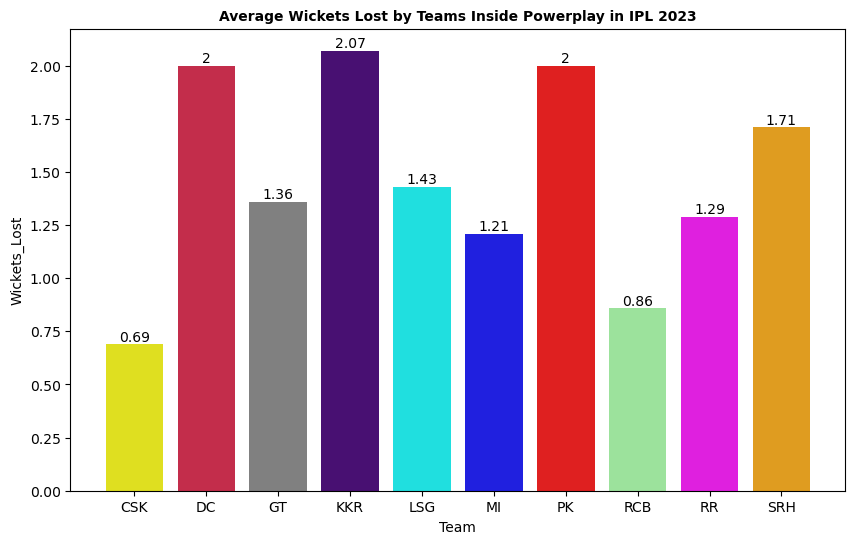

In [ ]:
# Size of the Chart
fig = plt.figure(figsize=(10,6))

# Choosing color palette for teams
palette = ['yellow', 'crimson', 'grey', 'indigo','cyan', 'blue','red','lightgreen','magenta','orange']

# Plotting the Bar Chart
ax = sns.barplot(data=analysis1, x="Team", y="Wickets_Lost", palette = palette)

# Displaying values corresponding to each bar
ax.bar_label(ax.containers[0])

# Setting Title Name
ax.set_title('Average Wickets Lost by Teams Inside Powerplay in IPL 2023', fontsize =10, fontweight ='bold')

# Displaying Chart
plt.plot()

[]

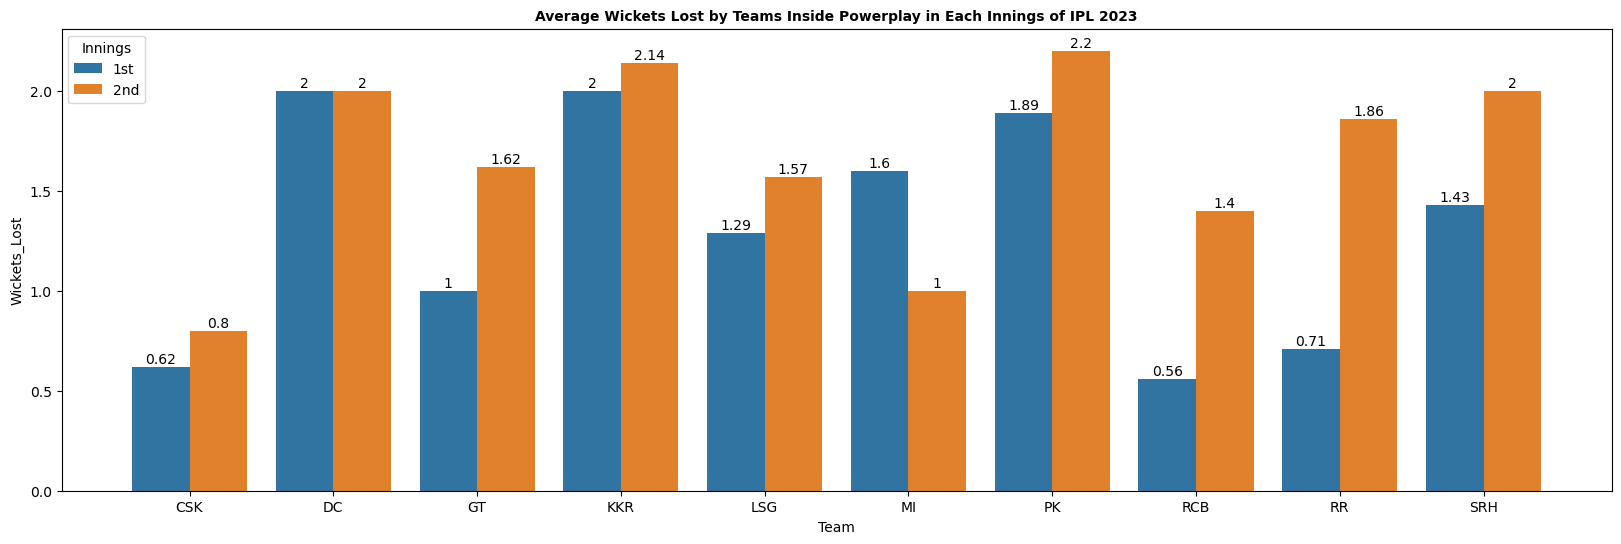

In [ ]:
# Size of the Chart
fig = plt.figure(figsize=(20,6))

# Plotting the Bar Chart
ax = sns.barplot(data=analysis2, x="Team", y="Wickets_Lost", hue = "Innings")

# Displaying values corresponding to 1st bar for each team
ax.bar_label(ax.containers[0])
# Displaying values corresponding to 2nd bar f0r each team
ax.bar_label(ax.containers[1])

# Setting Title Name
ax.set_title('Average Wickets Lost by Teams Inside Powerplay in Each Innings of IPL 2023', fontsize =10, fontweight ='bold')

# Displaying Chart
plt.plot()

**Facts:**

- The successful duo of Ruturaj Gaikwad and Devon Conway have started successfully for
    Chennai Super Kings (CSK) in the powerplay scoring at a brisk pace without losing wickets.
    On the other hand Delhi Capital (DC), Kolkata Knight Riders (KKR), Punjab Kings (PK) and
    Sunrisers Hyderabad (SRH) lost too many wickets in the powerplay and that has impacted their season.

- Mumbai Indians (MI) lost wickets while setting target for the opposition in a bid to take on the
    opposition while
    Royal Challengers Bangalore (RCB) and Rajasthan Royals (RR) started well while setting a competitive
    target for the opposition with their opening pair setting some solid foundation in the powerplay.

- Gujarat Titans (GT) started briskly in the powerplay without losing too many wickets and they set
    the tone for the players to come and score runs quickly. Lucknow Super Giants (LSG) were being
    over cautious while starting
    off with their innings and Rahul poor's form ended up not too well for the team's cause as more often then not
    they lost too many wickets while chasing.

### ***C. How many runs were scored by Teams in boundaries in IPL 2023 ?***

In [ ]:
# Analysis to figure out Runs/Percentage of Runs scored by Teams in boundaries and in singles in IPL 2023

analysis3 = batsman_df.copy()
analysis3 = analysis3[analysis3.Batsman != 'Extras']
analysis3['Runs_in_Boundaries'] = analysis3['4s'] * 4 + analysis3['6s'] * 6
analysis3['Runs_in_Singles'] = analysis3['Runs'] - analysis3['Runs_in_Boundaries']
analysis3[['Match_No', 'Innings','Batsman','Runs','4s','6s','Runs_in_Boundaries','Runs_in_Singles','Team']]
analysis3 = analysis3.groupby(['Team']).agg({'Runs_in_Boundaries':'sum','Runs_in_Singles':'sum', 'Runs':'sum'}).reset_index()
analysis3['Per_Runs_in_Boundaries'] = np.round((analysis3['Runs_in_Boundaries']*100.0/analysis3['Runs']), 2)
analysis3['Per_Runs_in_Singles'] = np.round((analysis3['Runs_in_Singles']*100.0/analysis3['Runs']), 2)

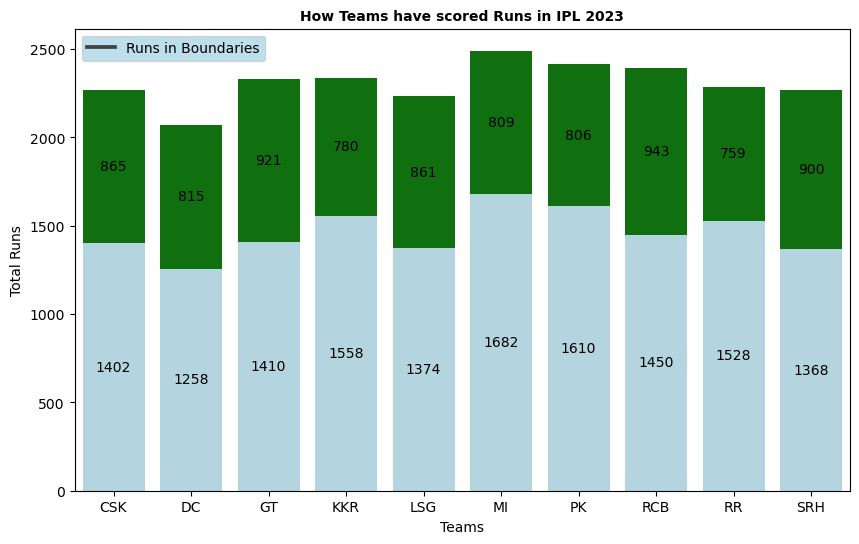

In [ ]:
# Size of the Chart
fig = plt.figure(figsize=(10,6))

# Plotting the first bar for Runs scored in Boundaries
bar1 = sns.barplot(x='Team', y='Runs_in_Boundaries', data=analysis3, color='lightblue')
bar1.bar_label(bar1.containers[0], label_type='center')
bar1.legend(['Runs in Boundaries'], loc='upper left')

# Stacking the second bar for Runs scored in Singles on top of the first bar created for Runs scored in Boundaries
bar2 = sns.barplot(x='Team', y='Runs_in_Singles', data=analysis3, color='green', bottom=analysis3['Runs_in_Boundaries'])
bar2.bar_label(bar2.containers[1], label_type='center')

# Labelling X and Y axis
plt.xlabel('Teams')
plt.ylabel('Total Runs')

# Setting color legend for Runs scored in Boundaires
legend1 = plt.legend(['Runs in Boundaries'], loc = 'upper left')
frame1 = legend1.get_frame()
frame1.set_facecolor('lightblue')

# Setting Title Name
plt.title('How Teams have scored Runs in IPL 2023', fontsize =10, fontweight ='bold')

# Displaying Chart
plt.show()

### ***D. How many percentage of runs were scored by Teams in boundaries in IPL 2023 ?***

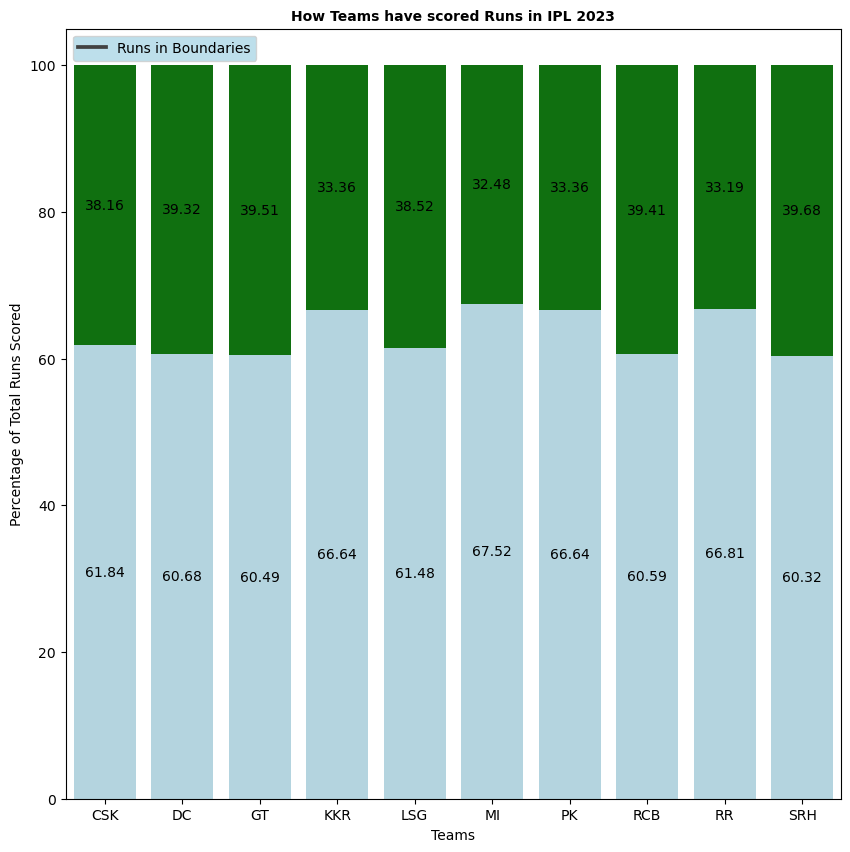

In [ ]:
# Size of the Chart
fig = plt.figure(figsize=(10,10))

# Plotting the first bar for Percentage of Runs scored in Boundaries
bar1 = sns.barplot(x='Team', y='Per_Runs_in_Boundaries', data=analysis3, color='lightblue')
bar1.bar_label(bar1.containers[0], label_type='center')

# Stacking the second bar for Percentage of Runs scored in Singles on top of the first bar created for Percentage of Runs scored in Boundaries
bar2 = sns.barplot(x='Team', y='Per_Runs_in_Singles', data=analysis3, color='green', bottom=analysis3['Per_Runs_in_Boundaries'])
bar2.bar_label(bar2.containers[1], label_type='center')

# Labelling X and Y axis
plt.xlabel('Teams')
plt.ylabel('Percentage of Total Runs Scored')

# Setting color legend for Runs scored in Boundaires
legend1 = plt.legend(['Runs in Boundaries'], loc = 'upper left')
frame1 = legend1.get_frame()
frame1.set_facecolor('lightblue')

# Setting Title Name
plt.title('How Teams have scored Runs in IPL 2023', fontsize =10, fontweight ='bold')

# Displaying Chart
plt.show()

**Facts:**

- Mumbai Indians (MI) have scored a great deal of runs in boundaries with Suryakumar Yadav,
    Cameron Green, Tilak Verma and Ishan Kishan being the aggressor. In addition to that the
    smaller grounds in Wankhede has also helped their cause. Kolkata Knight Riders (KKR) and
    Punjab Kings (PK) have also scored a great deal of runs in boundaries but they were not able
    to rotate the strike too a great deal as they lost wickets at regular intervals.

- Delhi Capitals (DC), Lucknow Super Giants (LSG), Sunrisers Hyderabad (SRH) could not score too
    many runs in boundaries and more often than not they ended up putting below par score on the board.

- Rajasthan Royals (RR) and Royal Challengers Bangalore (RCB) scored briskly in the powerplay
    but they could not finish the innings with lusty blows as their lower middle order could not
    force the cause.

- Chennai Supper Kings (CSK) and Gujarat Titans (GT) just hit the right amount of boundaries
    throughout the innings and they carried momentum from start to finish.

# **Chart Type 3: Histogram**

- Histogram is a graph that shows the frequency of numerical data using bars.The height of a bar represents the distribution frequency of a variable.

- Histogram gives a very good intuition about the spread/distribution of the data in a variable.  (Example: Maximum, Mininum or Median job offers of students in XYZ College)

**Let's understand Histogram with the help of few examples**

### ***A. What is the distribution of runs scored in IPL 2023 ?***

In [ ]:
# Analysis to figure out Runs Scored in IPL 2023

analysis4 = batsman_df.groupby(['Team','Match_No','Innings']).agg({'Runs':'sum'}).reset_index()

[]

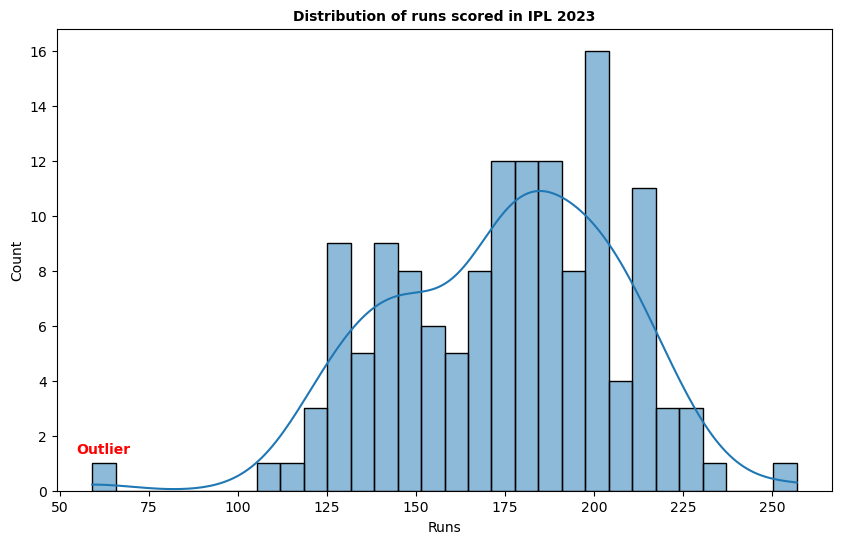

In [ ]:
# Size of the Chart
fig = plt.figure(figsize=(10,6))

# Plotting Distribution of Runs using Histplot
ax = sns.histplot(data=analysis4, x="Runs", kde = True, bins = 30)

# Setting Title Name
ax.set_title('Distribution of runs scored in IPL 2023', fontsize =10, fontweight ='bold')

# Annotation for Outlier
ax.text(62, 1.50, "Outlier", fontsize = 10, fontweight ='bold', color = "red", ha = "center", va = "center")

# Displaying Chart
plt.plot()

**Observation:**

- All the scores made by teams lie in the range of 105 to 230, with 185+ seeming like a competitive
    total for most of the teams.

- There is also a big score of 250+ posted by Lucknow Super Giants (LSG) against Punjab Kings (PK),
    while Rajasthan Royals got bundled out for mere 59 runs against Royal Challengers Bangalore (RCB),
    the same is highlighted as an 'Outlier' in the above graph.

### ***B. Does the Distribution of runs change while chasing in IPL 2023***

[]

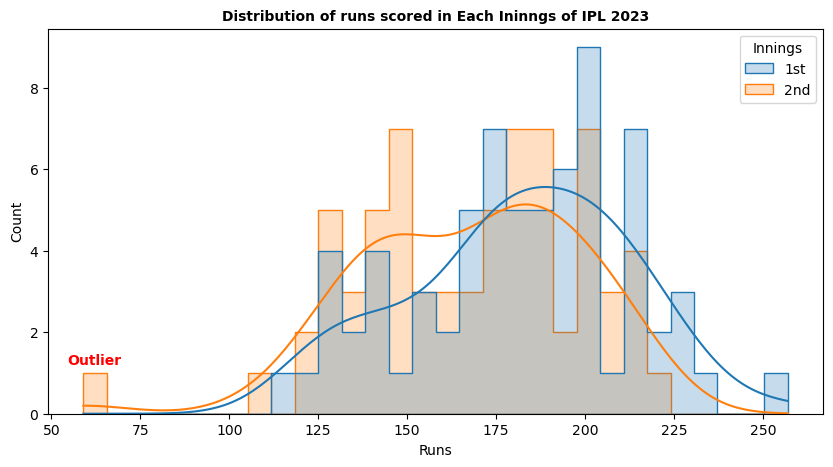

In [ ]:
# Size of the Chart
fig = plt.figure(figsize=(10,5))

# Plotting Distribution of Runs using Histplot
ax = sns.histplot(data=analysis4, x="Runs", hue="Innings", element="step", kde=True, bins = 30)

# Setting Title Name
ax.set_title('Distribution of runs scored in Each Ininngs of IPL 2023', fontsize =10, fontweight ='bold')

# Annotation for Outlier
ax.text(62, 1.30, "Outlier", fontsize = 10, fontweight ='bold', color = "red", ha = "center", va = "center")

# Displaying Chart
plt.plot()

**Obervation:**

- Most of the teams have chased successfully when the target has been around 175 but when the
    target was beyond 175, more often than not teams have failed to chase while batting second.

# **Chart Type 4: BoxPlot**

- A boxplot is a graph that gives a visual indication of how a dataset's mean, median, mode, minimum, maximum and outlier values are spread out and compare to each other. (Example: Maximum, Mininum or Median job offers of students in XYZ College)

- Boxplots are drawn as a box with a vertical line down the middle, and has horizontal lines attached to each side known as “whiskers”.

**Let's understand Box Plot with the help of few examples**

### ***A. Is there a significant difference in the Runs Scored in 1st Innings vs 2nd Innings of IPL 2023 ?***

[]

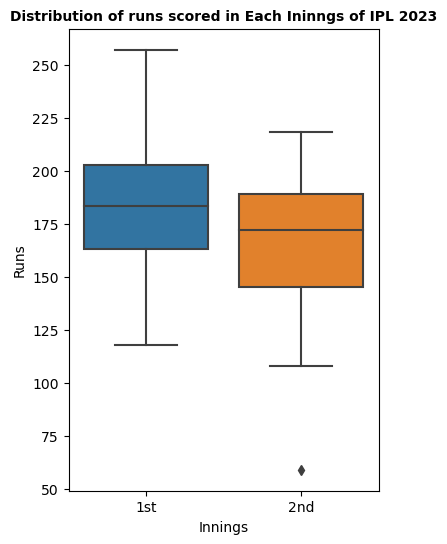

In [ ]:
# Size of the Chart
fig = plt.figure(figsize=(4,6))

# Plotting BoxPlot
ax = sns.boxplot(data=analysis4, x="Innings", y="Runs")

# Setting Title Name
ax.set_title('Distribution of runs scored in Each Ininngs of IPL 2023', fontsize =10, fontweight ='bold')

# Displaying Chart
plt.plot()

**Observation:**

- This is exactly the same analysis that we have performed in the Histogram section for distribution
    of runs scored in Each Ininngs of IPL 2023. The only difference is the fact that here we have
    represented our findings in the form of a boxplot which indicates clearly the range of values, median
    scores and outliers if any in the distribution of values.

### ***B. Is there a significant difference in the Runs Scored by Teams in IPL 2023 ?***

[]

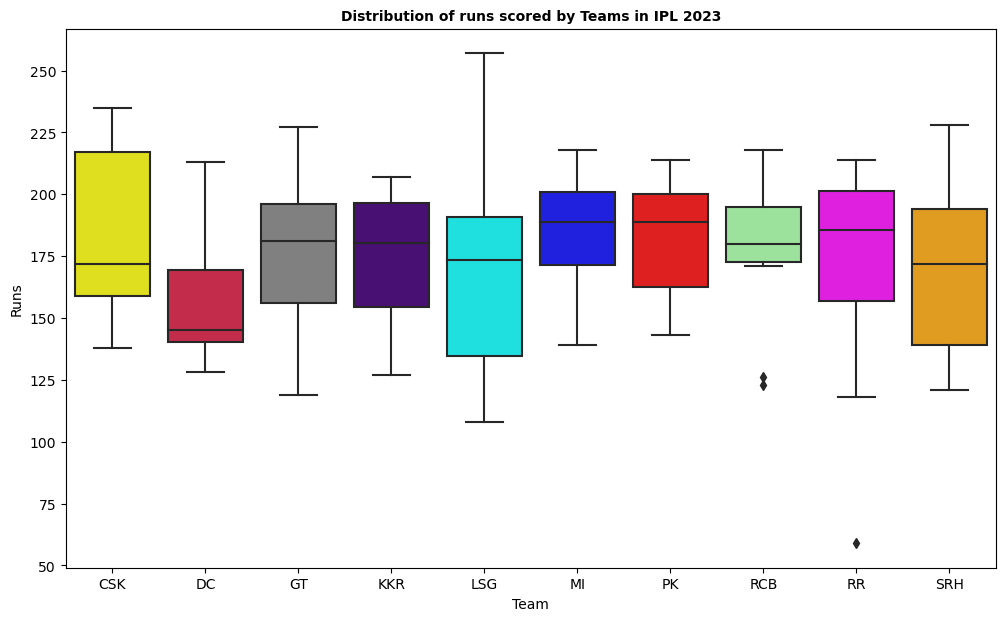

In [ ]:
# Size of the Chart
fig = plt.figure(figsize=(12, 7))

# Choosing color palette for teams
palette = ['yellow', 'crimson', 'grey', 'indigo','cyan', 'blue','red','lightgreen','magenta','orange']

# Plotting BoxPlot
ax = sns.boxplot(data=analysis4, x="Team", y="Runs", palette = palette)

# Setting Title Name
ax.set_title('Distribution of runs scored by Teams in IPL 2023', fontsize =10, fontweight ='bold')

# Displaying Chart
plt.plot()

**Observation:**

- The above graph shows the distribution of scores for teams in the IPL 2023 season.

# **Chart Type 5: Violin Plot**

- A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one or more categorical variables.

- Just like Histogram and Box Plot, Violin Plot gives a very good intuition about the spread/distribution of the data in a variable.(Example: Maximum, Mininum or Median job offers of students in XYZ College)

**Let's understand Violin Plot with the help of few examples**

### ***A. Is there a significant difference in the Runs Scored in 1st Innings vs 2nd Innings of IPL 2023 ?***

[]

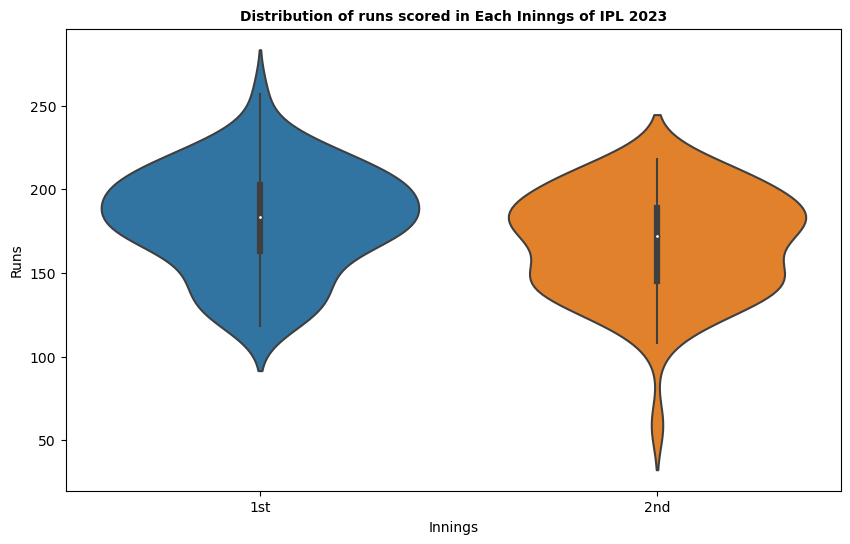

In [ ]:
# Size of the Chart
fig = plt.figure(figsize=(10,6))

# Plotting ViolinPlot
ax = sns.violinplot(data=analysis4, x="Innings", y="Runs")

# Setting Title Name
ax.set_title('Distribution of runs scored in Each Ininngs of IPL 2023', fontsize =10, fontweight ='bold')

# Displaying Chart
plt.plot()

**Observation:**

- This analysis is similar to the one that we performed in the histogram and boxplot section,
    just a completely different way of presenting the results. If you observe closely, you will find
    a boxplot embedded inside the violinplot.

### ***B. Is there a significant difference in the Runs Scored by Teams in IPL 2023 ?***

[]

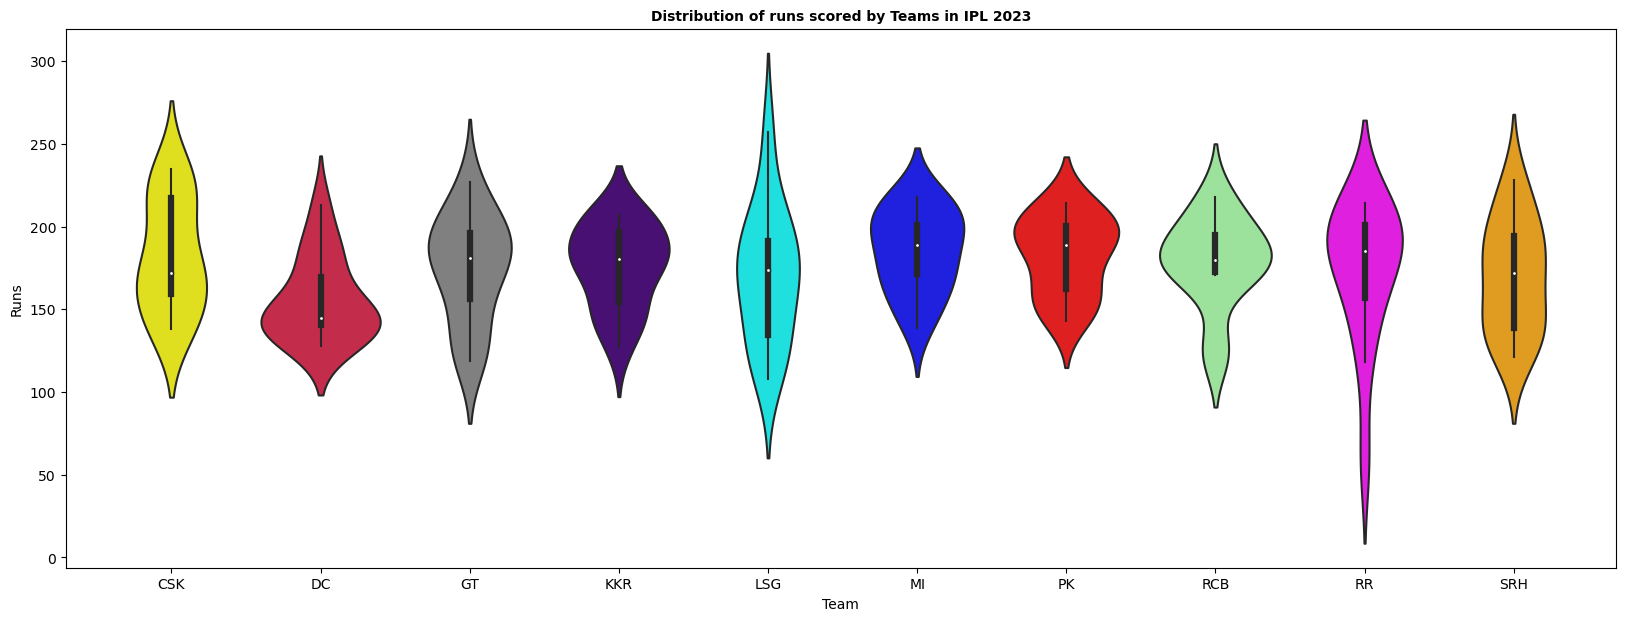

In [ ]:
# Size of the Chart
fig = plt.figure(figsize=(20, 7))

# Choosing color palette for teams
palette = ['yellow', 'crimson', 'grey', 'indigo','cyan', 'blue','red','lightgreen','magenta','orange']

# Plotting ViolinPlot
ax = sns.violinplot(data=analysis4, x="Team", y="Runs", palette = palette)

# Setting Title Name
ax.set_title('Distribution of runs scored by Teams in IPL 2023', fontsize =10, fontweight ='bold')

# Displaying Chart
plt.plot()

**Observation:**

- This output is similar to the results that we performed in the boxplot section and just like
    I mentioned previously an entirely different way of representing the results of distribution
    of runs scored by Teams in IPL 2023.

# **Chart Type 6: Contour Plot or Density Plot**

- A density plot is a representation of the distribution of a numeric variable that uses a kernel density estimate to show the probability density function of the variable.

- In short Contour Plot or Density Plot gives an idea about concentration/density of points in a chart. (Example: Map of a Region showing the area where the concentration of trees is dense or intense as compared to the neighbouring or surrounding areas)

**Let's understand Contour Plot of Density Plot with the help of few examples**

### ***A. Who were more effective in IPL 2023 - Seamers or Spinners ?***

**Please Note:** We will restrict our analysis to bowlers who have bowled atleast 10 overs and taken a minimum of 5 wickets.

In [ ]:
# Analysis to figure out list of bowlers who bowled atleast 10 overs and took minimum 5 wickets

analysis5 = bowler_df.merge(player_df, left_on='Bowler', right_on='Player_Name', how = 'left')
analysis5 = analysis5.groupby(['Bowler','Seamer_or_Spinner']).agg({'Overs_Bowled':'sum','Runs_Scored':'sum','Wickets':'sum'}).reset_index()
analysis5['Economy_Rate'] = round(analysis5['Runs_Scored']/analysis5['Overs_Bowled'],2)
analysis5 = analysis5[(analysis5['Overs_Bowled'] >= 10) & (analysis5['Wickets'] >= 5)]

[]

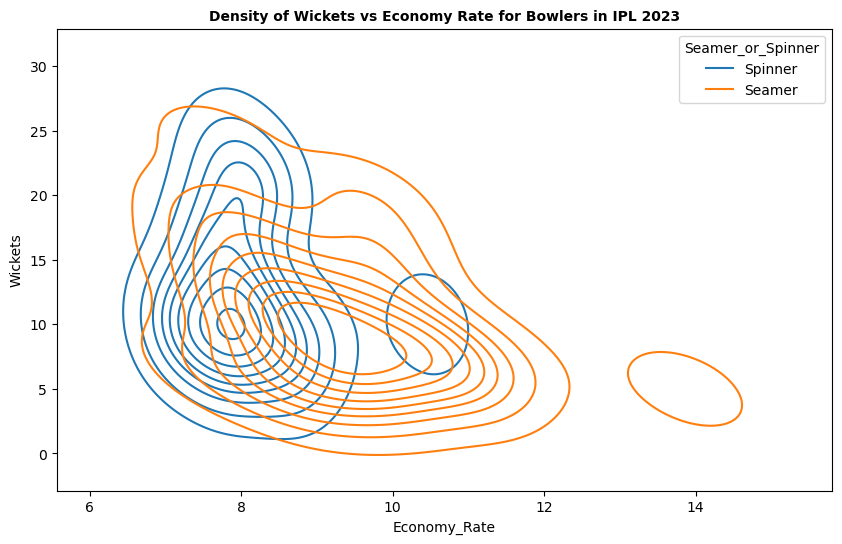

In [ ]:
# Size of the Chart
fig = plt.figure(figsize=(10,6))

# Plotting contour plot using kdeplot
ax = sns.kdeplot(data=analysis5, x="Economy_Rate", y="Wickets", hue="Seamer_or_Spinner")

# Setting Title Name
ax.set_title('Density of Wickets vs Economy Rate for Bowlers in IPL 2023', fontsize =10, fontweight ='bold')

# Displaying Chart
plt.plot()

**Observation:**

- Seems like most of the spinners had an economy rate in the range of 7 to 9 runs and they have
    picked up on an average 9 to 15 wickets.
    
- The seamers on the other hand had a slightly higher economy rate between 8 to 11 runs and they
    have picked up on an average 5 to 15 wickets.

- Also the wickets in India seem to offer a little more to the spinners when compared to fast
    bowlers, which could very well explain the density of the rings.

[]

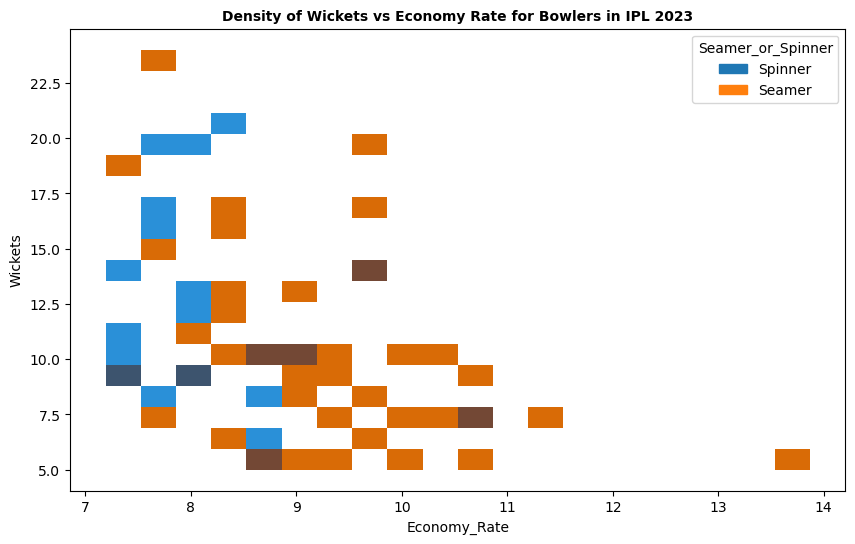

In [ ]:
# Size of the Chart
fig = plt.figure(figsize=(10,6))

# Plotting density plot using histplot
ax = sns.histplot(data=analysis5, x="Economy_Rate", y="Wickets", hue="Seamer_or_Spinner", bins=20)

# Setting Title Name
ax.set_title('Density of Wickets vs Economy Rate for Bowlers in IPL 2023', fontsize =10, fontweight ='bold')

# Displaying Chart
plt.plot()

**Observation:**

- The above density plot is just a different way of representing the results of the comparison
    of performance of spinners vs fast bowlers but the graph seems to resonate with our findings from the
    contour plot section depicted in the results just before this piece of analysis.

# **Chart Type 7: HeatMap**

- A heat map is a 2-dimensional data visualization technique that represents the magnitude of individual values within a dataset as a color. The variation in color may be by hue or intensity. (Example: Correlation between different factors that could cause breast cancer)

**Let's understand Heat Map with the help of few examples**

### ***A. Which Team has conceded the maximum number of extras***

In [ ]:
# Analysis to figure out the Extras conceded by teams

analysis6 = bowler_df[['Match_No','Innings','Team']].drop_duplicates()
batsman_df['Batsman'] = batsman_df['Batsman'].str.strip()
analysis7 = batsman_df.merge(player_df, left_on='Batsman', right_on='Player_Name', how = 'left')
analysis8 = analysis7[analysis7.Batsman != 'Extras']
analysis9 = analysis7[analysis7.Batsman == 'Extras']
analysis10 = analysis9.merge(analysis6, left_on = ['Match_No','Innings'], right_on = ['Match_No','Innings'], how = 'left')
analysis10 = analysis10.groupby(['Team']).agg({'Byes':'sum','Leg_Byes':'sum', 'No_Ball':'sum','Wides':'sum'})

[]

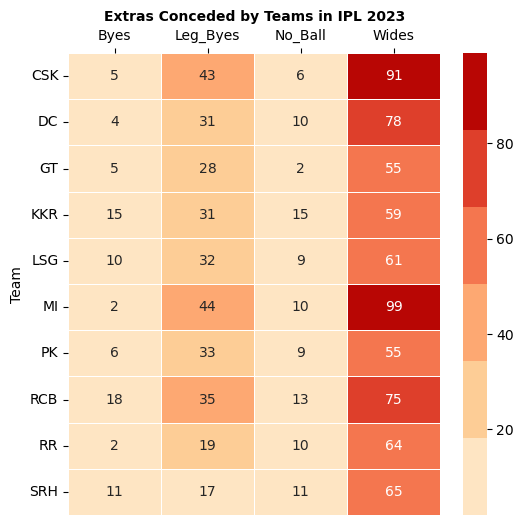

In [ ]:
# Size of the Chart
plt.figure(figsize=(6,6))

# Choosing color palette
colormap = sns.color_palette("OrRd")

# Plotting the HeatMap
ax = sns.heatmap(analysis10, annot = True, fmt=".0f", linewidths=.5, linecolor='white', cmap=colormap)

# Displaying Extras at the top
ax.xaxis.tick_top()

# Setting the orientation of Labels in Y Axis
plt.yticks(rotation=0)

# Setting Title Name
ax.set_title('Extras Conceded by Teams in IPL 2023', fontsize =10, fontweight ='bold')

# Displaying Chart
plt.plot()

**Facts:**

- Chennai Super Kings (CSK) and Mumbai Indians (MI) have conceded a lot of extras in the tournament
    as they had to start the tournament with an inexperienced bowling line up owing to too many injuries
    and retirements of their marquee players.

- Royal Challengers Bangalore (RCB) also had an farily weak bowling line up and most of their go to
    bowlers were off the mark in the tournament leading to too many extras. Delhi Capitals (DC) also
    had a poor outing in the tournament when it came to bowling and most of their bowlers gave away too many extras
    throughout the tournament.

# **Chart Type 8: Line Chart**

- A line chart or line plot, is a type of chart which displays information as a series of data points called 'markers' connected by straight line segments.

- This is the most basic type of chart used in finance, and it typically only depicts a security's closing prices over time. Line charts can be used for any timeframe, but they most often use day-to-day price changes. (Example: Stock Price of Nike over a period of 30 days, Change in temperature of Bengaluru over a 24 hour period)

**Let's understand Line Chart with the help of few examples**

### ***A. How have scores have been chased successfully in IPL 2023 ?***

In [ ]:
# Analysis to figure out runs scores in each innings of IPL 2023

analysis11 = analysis4.sort_values(['Match_No', 'Innings'])
analysis11['diffs'] = analysis11.groupby('Match_No')['Runs'].diff()
analysis11 = analysis11[analysis11.Innings == '2nd']

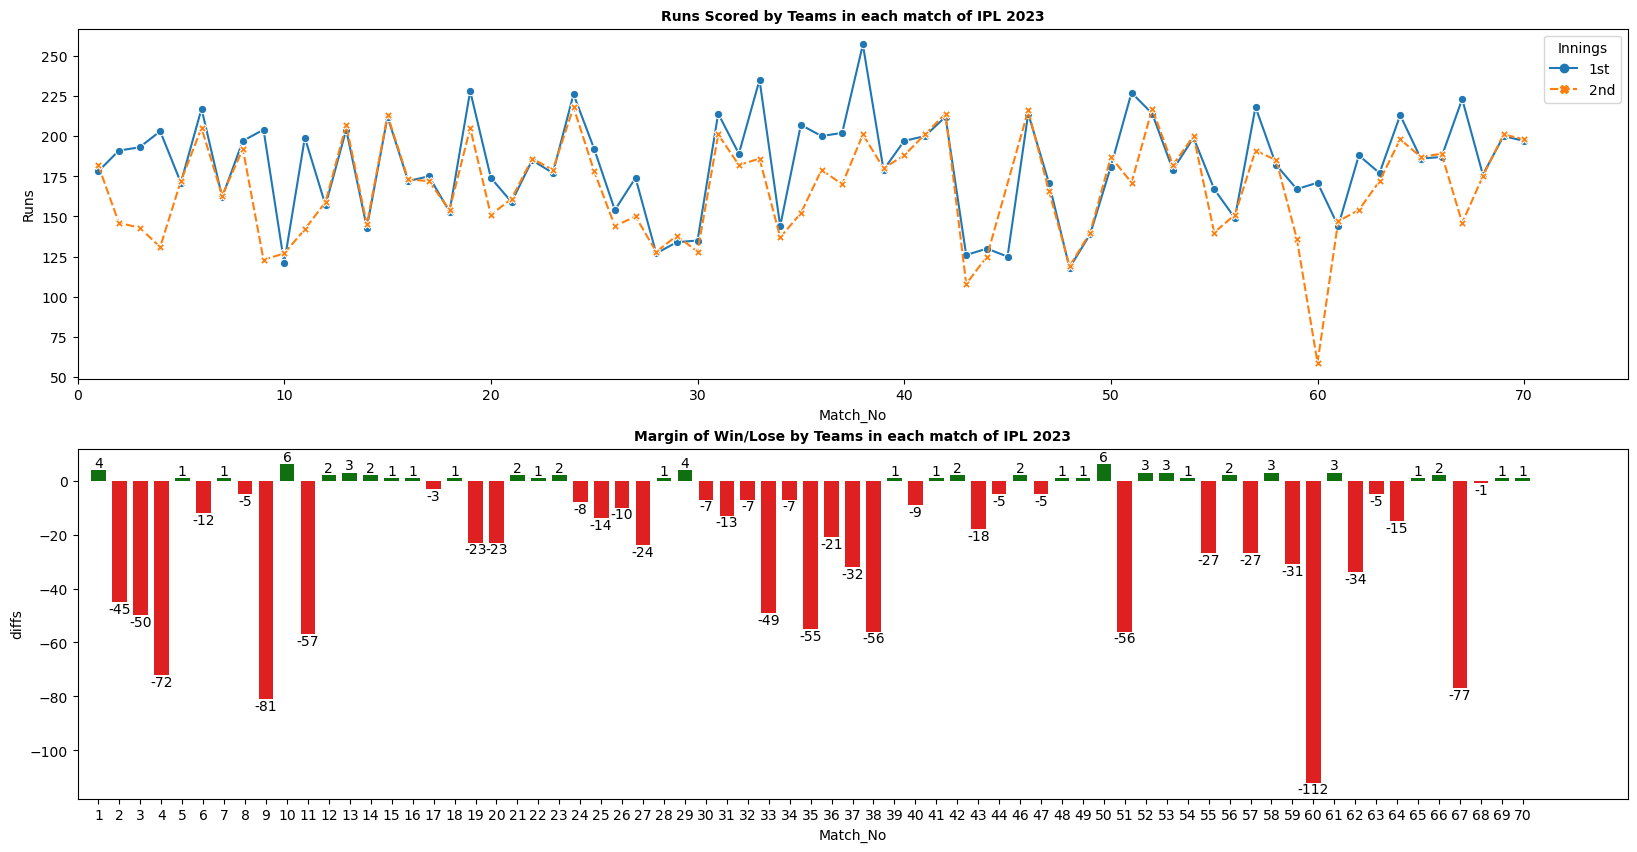

In [ ]:
# Defining runs and axes for plotting Charts
fig, axes = plt.subplots(2,1,figsize=(20,10))

# Plotting Line Chart on Sub Plot 1
sns.lineplot(data = analysis4, x = "Match_No", y = "Runs", hue = "Innings", markers = True, style = "Innings", ax=axes[0])

# Setting X Axis parameters for Sub Plot 1
axes[0].set_xlim(0, 75)

# Setting Title names for Sub Plot 1
axes[0].set_title('Runs Scored by Teams in each match of IPL 2023', fontsize =10, fontweight ='bold')

# Defining Color Band
colour = ['red' if val < 0 else 'green' for val in analysis11.diffs]

# Plotting Bar Chart on Sub Plot 2
sns.barplot(data = analysis11, x = "Match_No", y = "diffs", width=0.7, palette = colour, ax=axes[1])

# Setting X Axis parameters for Sub Plot 2
axes[1].set_xlim(-1, 73)

# Setting Title names for Sub Plot 2
axes[1].set_title('Margin of Win/Lose by Teams in each match of IPL 2023', fontsize =10, fontweight ='bold')

# Displaying values corresponding to each bar
axes[1].bar_label(axes[1].containers[0])

# Displaying Chart
plt.show()

**Observation:**

- The first graph gives us an idea about how teams have scored and chased throughout the league phase
    of the tournament.

- The second graph gives us an indication of margin of win or lose throughout the tournament and
    fits well with our analysis that we performed in the count plot section of this notebook, where we saw
    that 37 matches were won by teams batting first.

# **Chart Type 9: Scatter Plot**

- A scatter plot is used to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point.

- Scatter plots are used to observe relationships between variables and could serve a could indicator of dependency of one numeric variable on the other variable. (Example: Price of a second hand car vs Age of the car)

**Let's understand Scatter Plot with the help of few examples**

### ***A. How have left handed batters performed in comparison to right handed batters?***

**Please Note:** We will restrict our analysis to batters who have played atleast 5 matches or faced a minimum of 30 deliveries.

In [ ]:
# Analysis to figure out list of Batsman who played atleast 5 matches or faced minimum 30 deliveries

analysis8 = analysis8.groupby(['Batsman','Batter_Type']).agg({'Runs':'sum','Innings':'count','Balls_Faced':'sum'}).reset_index()
analysis8['Strike_Rate'] = np.round(analysis8['Runs']/analysis8['Balls_Faced']*100, 2)
analysis8 = analysis8[(analysis8['Innings'] >=5) | (analysis8['Balls_Faced'] >=30)]

[]

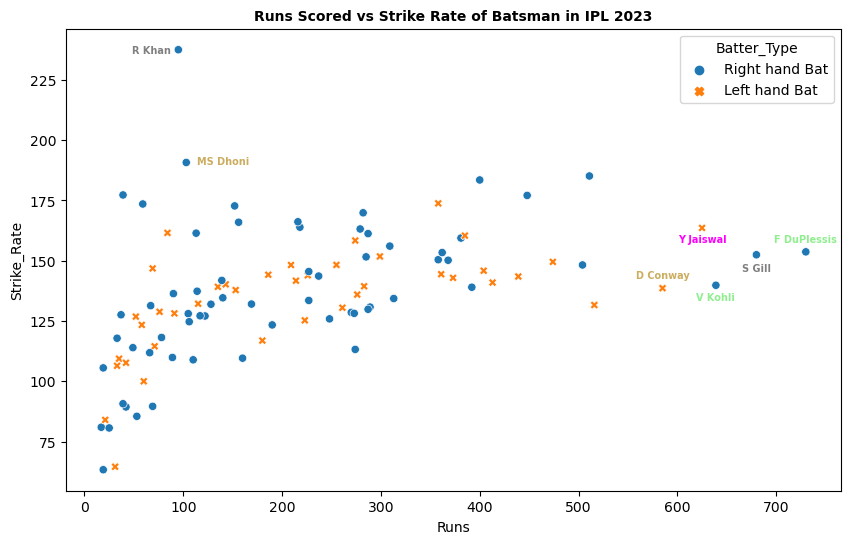

In [ ]:
# Size of the Chart
fig = plt.figure(figsize=(10,6))

# Plotting Scatter Plot
ax = sns.scatterplot(data=analysis8, x="Runs", y="Strike_Rate", hue="Batter_Type", style = "Batter_Type")

# Setting Title Name
ax.set_title('Runs Scored vs Strike Rate of Batsman in IPL 2023', fontsize =10, fontweight ='bold')

# Annotation for Faf Du Plessis
ax.text(730, 159, "F DuPlessis", fontsize = 7, fontweight ='bold', color = "lightgreen", ha = "center", va = "center")

# Annotation for Rashin Khan
ax.text(68, 237.3, "R Khan", fontsize = 7, fontweight ='bold', color = "grey", ha = "center", va = "center")

# Annotation for MS Dhoni
ax.text(140, 191, "MS Dhoni", fontsize = 7, fontweight ='bold', color = "#ccad60", ha = "center", va = "center")

# Annotation for Shubham Gill
ax.text(680, 147, "S Gill", fontsize = 7, fontweight ='bold', color = "grey", ha = "center", va = "center")

# Annotation for Devon Conway
ax.text(585, 144, "D Conway", fontsize = 7, fontweight ='bold', color = "#ccad60", ha = "center", va = "center")

# Annotation for Yashasvi Jaiswal
ax.text(625, 159, "Y Jaiswal", fontsize = 7, fontweight ='bold', color = "magenta", ha = "center", va = "center")

# Annotation for Virat Kohli
ax.text(639, 135, "V Kohli", fontsize = 7, fontweight ='bold', color = "lightgreen", ha = "center", va = "center")

# Displaying Chart
plt.plot()

**Observation:**

- The above scatterplot seems to suggest the fact that as the number of runs scored by the batsman
    increased slowly and gradually, the strike rate also improved considerably.
    
**Facts:**
    
- Players who scored less runs and had a higher strike rate like Rashid Khan and MS Dhoni, were
    playing the role of a finisher and more often than not ended up scoring at a strike rate of more
    than 200 as they were looking for boundaries as the fag end of the innings.

- Faf Du Plessis, Shubhman Gill, Virat Kohli, Yashasvi Jaiswal and Devon Conway were the leading run scores
    in the league phase of the tournament with an impressive strike rate above 140+

### ***B. How have seamers performed in comparison to spinners?***

[]

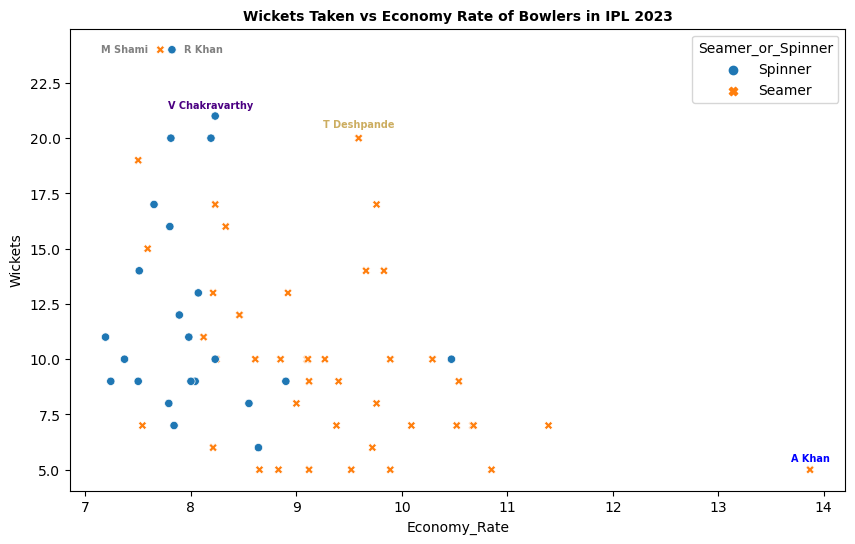

In [ ]:
# Size of the Chart
fig = plt.figure(figsize=(10,6))

# Plotting the scatterplot
ax = sns.scatterplot(data=analysis5, x="Economy_Rate", y="Wickets", hue="Seamer_or_Spinner", style = "Seamer_or_Spinner")

# Setting Title Name
ax.set_title('Wickets Taken vs Economy Rate of Bowlers in IPL 2023', fontsize =10, fontweight ='bold')

# Annotation for Arshad Khan
ax.text(13.87, 5.5, "A Khan", fontsize = 7, fontweight ='bold', color = "blue", ha = "center", va = "center")

# Annotation for Mohammed Shami
ax.text(7.37, 24, "M Shami", fontsize = 7, fontweight ='bold', color = "grey", ha = "center", va = "center")

# Annotation for Rashin Khan
ax.text(8.12, 24, "R Khan", fontsize = 7, fontweight ='bold', color = "grey", ha = "center", va = "center")

# Annotation for Varun Chakravarthy
ax.text(8.19, 21.5, "V Chakravarthy", fontsize = 7, fontweight ='bold', color = "indigo", ha = "center", va = "center")

# Annotation for Tushar Deshpande
ax.text(9.59, 20.6, "T Deshpande", fontsize = 7, fontweight ='bold', color = "#ccad60", ha = "center", va = "center")

# Displaying Chart
plt.plot()

**Observation:**

- The spinners had a much lesser economy rate and have also picked up much more wickets when compared
    to the fast bowlers. We discussed this idea in the contour plot section of the notebook but scatter
    plot seems to give us a good idea about our previous reasoning.

**Facts:**

- The duo of Mohammed Shami and Rashin Khan were very good for Gujarat Titans (GT) throughout the
    league stages of the tournament, with both the bowlers picking up 24 wickets at an economy of less than
    8 runs an over. Varun Chakravarty on the other hand was the only bright spot for Kolkata Knight Riders
    (KKR) while Tushar Deshpande had a higher economy rate but he picked up crucial wickets for
    Chennai Super Kings (CSK) in the league stage of the tournament. Arshad Khan had a very high economy
    rate but he played very few matches for Mumbai Indians (MI), which could very well explain the high
    economy rate.

# **Chart Type 10: Pie Chart**

- A pie chart is a circular statistical graphic which is divided into slices to illustrate numerical proportion. In a pie chart, the arc length of each slice is proportional to the quantity it represents. (Example: marks obtained by students in a class)

**Let's understand Pie Chart with the help of few examples**

### ***A. Which Team has made the best choice of batsman as Impact Sub ?***

In [ ]:
# Analysis to figure out Runs scored by Impact Subs in IPL 2023

analysis12 = analysis7[analysis7.Impact_Sub == 'Yes'].groupby(['Team_x']).agg({'Runs':'sum'}).reset_index()

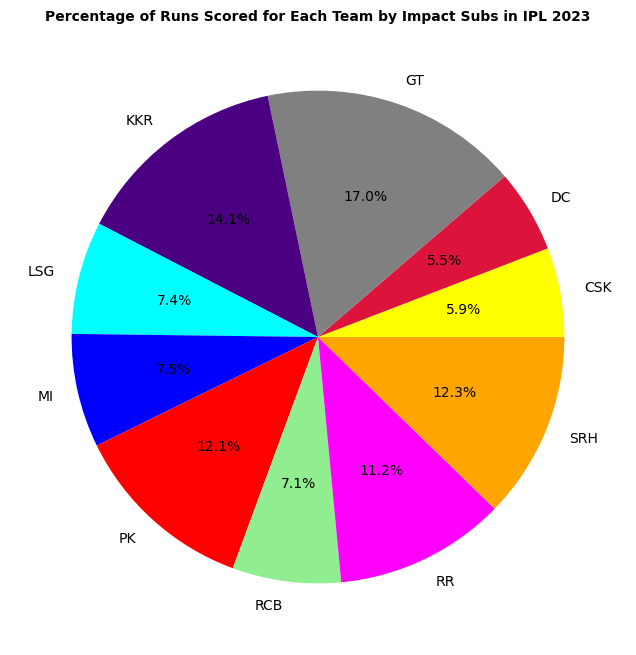

In [ ]:
# Size of the Chart
plt.figure(figsize=(10,8))

# Choosing Color Palette
palette_color = ['yellow', 'crimson', 'grey', 'indigo','cyan', 'blue','red','lightgreen','magenta','orange']

# Plotting Pie Chart
plt.pie(analysis12['Runs'], labels=analysis12['Team_x'], colors=palette_color, autopct='%1.1f%%')

# Setting Title Name
plt.title(f'Percentage of Runs Scored for Each Team by Impact Subs in IPL 2023', fontsize =10, fontweight ='bold')

# Displaying Chart
plt.show()

**Observation:**

- The above chart gives an idea about the percentage of runs scored by the Impact Subs for their
    respective teams out of the total runs scored by the Impact Subs during the entire tournament.

**Tip:**

- Even though the chart gives a good indication of the share of pie for respective teams but
    pie chart should be avoided when the number of categories/entries are more than 4 as they fail to
    paint a clear picture of the share in absolute terms. To enforce the understanding, I have
    performed the same analysis with the help of bar chart in the below diagram and it seems to perform
    much better when compared to pie chart.

[]

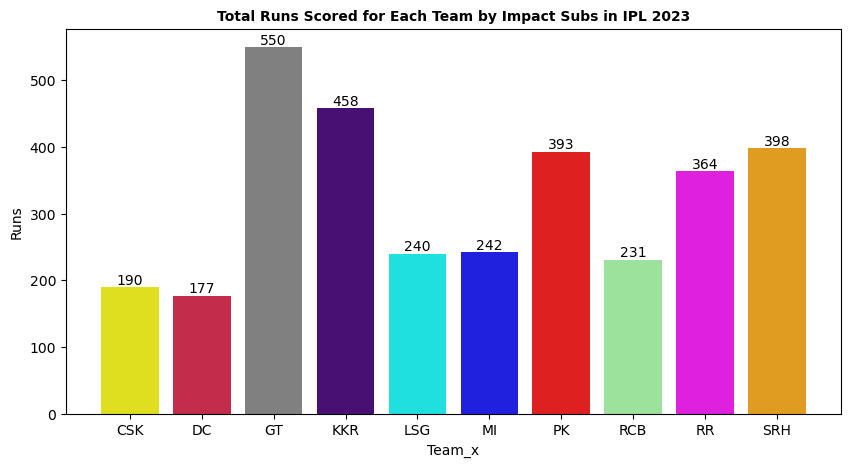

In [ ]:
# Size of the Chart
fig = plt.figure(figsize=(10,5))

# Choosing color palette for teams
palette = ['yellow', 'crimson', 'grey', 'indigo','cyan', 'blue','red','lightgreen','magenta','orange']

# Plotting Bar Chart
ax = sns.barplot(data=analysis12, x="Team_x", y="Runs", palette = palette)

# Displaying values corresponding to each bar
ax.bar_label(ax.containers[0])

# Setting Title Name
ax.set_title('Total Runs Scored for Each Team by Impact Subs in IPL 2023', fontsize =10, fontweight ='bold')

# Displaying Chart
plt.plot()

**Observation:**

- As compared to the pie chart, the bar chart does a better job of depicting the absolute value
    of runs scored by the Impact subs for their respective teams.

**Facts:**

- Gujarat Titans (GT) used Shubhman Gill as an Impact Sub, who had a stellar season, which could
    very well explain the numbers.
    
- Kolkata Knight Riders (KKR) used Venkatesh Iyer as Impact Sub who also had a great season.
    
- Rajasthan Royals (RR) on the other hand used a lot of players as Impact Subs. Yashasvi Jaiswal,
    Dhruv Jurel, Jos Buttler, Devdutt Padikkal all played the role of Impact Subs for RR throughout
    the tournament.
    
- Punjab Kings (PK) majorly used less known Prabhsimran Singh who had a good IPL 2023 season.

- Just like RR, Sunrisers Hyderabad (SRH), Delhi Capitals (DC), Royal Challengers Bangalore (RCB),
    Lucknow Super Giants (LSG) and Mumbai Indians (MI) have also used multiple players as Impact Subs
    throughout the tournament.

- Chennai Super Kings (CSK) batting line up was stacked with all rounders and hence they have used
    the experienced pinch hitter Ambati Rayudu as their Impact Subs.

### ***B. Which Team has made the best choice of bowler as Impact Sub ?***

In [ ]:
analysis13 = bowler_df.merge(player_df, left_on='Bowler', right_on='Player_Name', how = 'left')
analysis13 = analysis13[analysis13.Impact_Sub == 'Yes'].groupby(['Team_x']).agg({'Wickets':'sum'}).reset_index()

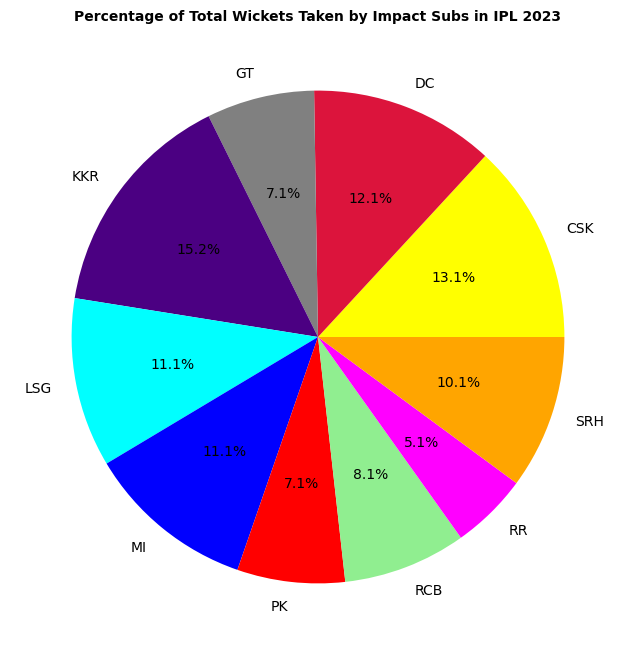

In [ ]:
# Size of the Chart
fig = plt.figure(figsize=(10,8))

# Choosing color palette for teams
palette_color = ['yellow', 'crimson', 'grey', 'indigo','cyan', 'blue','red','lightgreen','magenta','orange']

# Plotting Pie Chart
plt.pie(analysis13['Wickets'], labels=analysis13['Team_x'], colors=palette_color, autopct='%1.1f%%')

# Setting Title Name
plt.title(f'Percentage of Total Wickets Taken by Impact Subs in IPL 2023', fontsize =10, fontweight ='bold')

# Displaying Chart
plt.show()

**Observation:**

- Just like I mentioned in the previous discussion, pie charts fails to paint the true picture of
    the data in absolute terms, we will resort to Bar Chart to explain the above analysis.

[]

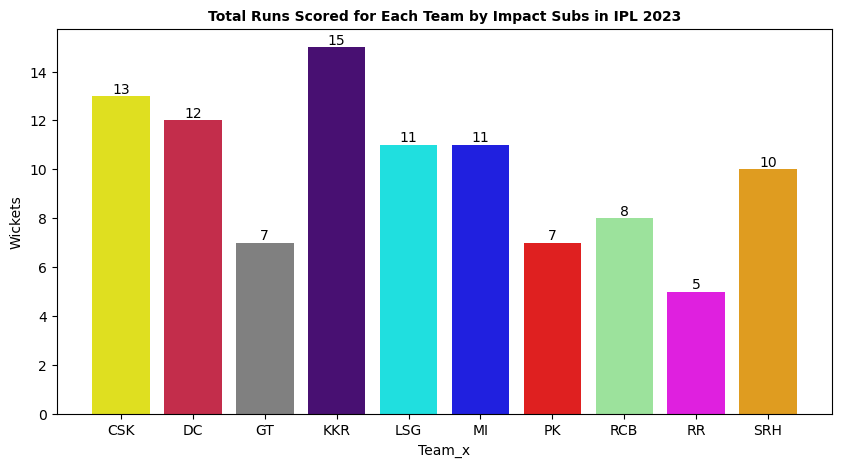

In [ ]:
# Size of the Chart
fig = plt.figure(figsize=(10,5))

# Choosing color palette for teams
palette = ['yellow', 'crimson', 'grey', 'indigo','cyan', 'blue','red','lightgreen','magenta','orange']

# Plotting Bar Chart
ax = sns.barplot(data=analysis13, x="Team_x", y="Wickets", palette = palette)

# Displaying values corresponding to each bar
ax.bar_label(ax.containers[0])

# Setting Title Name
ax.set_title('Total Runs Scored for Each Team by Impact Subs in IPL 2023', fontsize =10, fontweight ='bold')

# Displaying Chart
plt.plot()

**Facts:**

- Kolkata Knight Riders (KKR) used a lot of spinners as Impact Subs. Varun Charkravarthy, Suyash Sharma
    and Anukul Roy were more than handy with the bowl.

- Chennai Super Kings (CSK) were effective in choosing their Impact Subs. Tushar Deshpande, Akash Singh,
    Maheesh Theekshana and Matheesha Pathirana were very good with the new ball and even in the death overs.

- Delhi Capitals (DC), Mumbai Indians (MI) and Lucknow Super Giants (LSG) also used a handful of bowlers
    as Impact Subs.

- Rest of the teams in the league could not make good use of the Impact Subs during the league stages
    of IPL 2023



***With that I leave you guys with a favorite memory of mine from the IPL 2023 season. Hope you guys liked my analysis.***

<img src="https://media.crictracker.com/media/attachments/1685454976618_Ravindra-Jadeja-and-MSD.jpeg" align="center">

***Please do visit my other articles in case you enjoyed reading this one.***

**Link:** [Nike Stock Price Analysis using ARIMA Models](https://www.kaggle.com/code/dreamer1987/nike-stock-price-analysis-using-arima-models/notebook)

# **References**

1. [How to Set the Color of Bars in a Seaborn Barplot](https://www.statology.org/seaborn-barplot-color/)
2. [Adding Text Annotations in Seaborn](https://python-charts.com/seaborn/texts/#:~:text=If%20you%20want%20to%20add,to%20display%20inside%20the%20plot.&text=The%20text%20can%20be%20customized%20in%20several%20ways.)
3. [Creating Stacked Bar Charts with Seaborn and Matplotlib](https://saturncloud.io/blog/creating-stacked-bar-charts-with-seaborn-and-matplotlib/)
4. [How to change Seaborn legends font size, location and color?](https://www.geeksforgeeks.org/how-to-change-seaborn-legends-font-size-location-and-color/)

<img src="https://p.kindpng.com/picc/s/646-6464705_thanks-for-reading-png-transparent-png.png" align="center">